In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/HistoricalData_1730071069838.csv')

In [ ]:
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/25/2024,$165.27,19828880,$163.67,$165.59,$163.42
1,10/24/2024,$162.72,22412530,$162.83,$163.33,$161.01
2,10/23/2024,$162.78,18280520,$164.76,$165.82,$161.925
3,10/22/2024,$165.14,16568120,$162.98,$165.77,$162.98
4,10/21/2024,$164.07,20946460,$162.95,$164.50,$162.62


In [ ]:
data['Open']

,Open
0,$163.67
1,$162.83
2,$164.76
3,$162.98
4,$162.95
...,...
2512,$28.415
2513,$27.9125
2514,$28.0425
2515,$27.5855


In [ ]:
columns = ['Close/Last', 'Open', 'High', 'Low']
data[columns] = data[columns].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/25/2024,165.27,19828880,163.67,165.59,163.420
1,10/24/2024,162.72,22412530,162.83,163.33,161.010
2,10/23/2024,162.78,18280520,164.76,165.82,161.925
3,10/22/2024,165.14,16568120,162.98,165.77,162.980
4,10/21/2024,164.07,20946460,162.95,164.50,162.620


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2517 non-null   object 
 1   Close/Last  2517 non-null   float64
 2   Volume      2517 non-null   int64  
 3   Open        2517 non-null   float64
 4   High        2517 non-null   float64
 5   Low         2517 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 118.1+ KB


In [ ]:
data.describe()

,Close/Last,Volume,Open,High,Low
count,2517.000000,2.517000e+03,2517.000000,2517.000000,2517.000000
mean,79.968846,3.530744e+07,79.936225,80.782121,79.119878
std,42.331123,1.698052e+07,42.317355,42.789752,41.874607
min,24.853000,9.312760e+06,24.962000,25.014000,24.545500
25%,44.572000,2.493571e+07,44.569500,44.668900,44.359000
50%,62.220500,3.103810e+07,62.250000,62.828000,61.668500
75%,116.583000,4.009318e+07,116.230000,117.919800,114.869800
max,191.180000,2.569376e+08,190.310000,191.750000,189.030000


In [ ]:
data.isnull().sum()

,0
Date,0
Close/Last,0
Volume,0
Open,0
High,0
Low,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

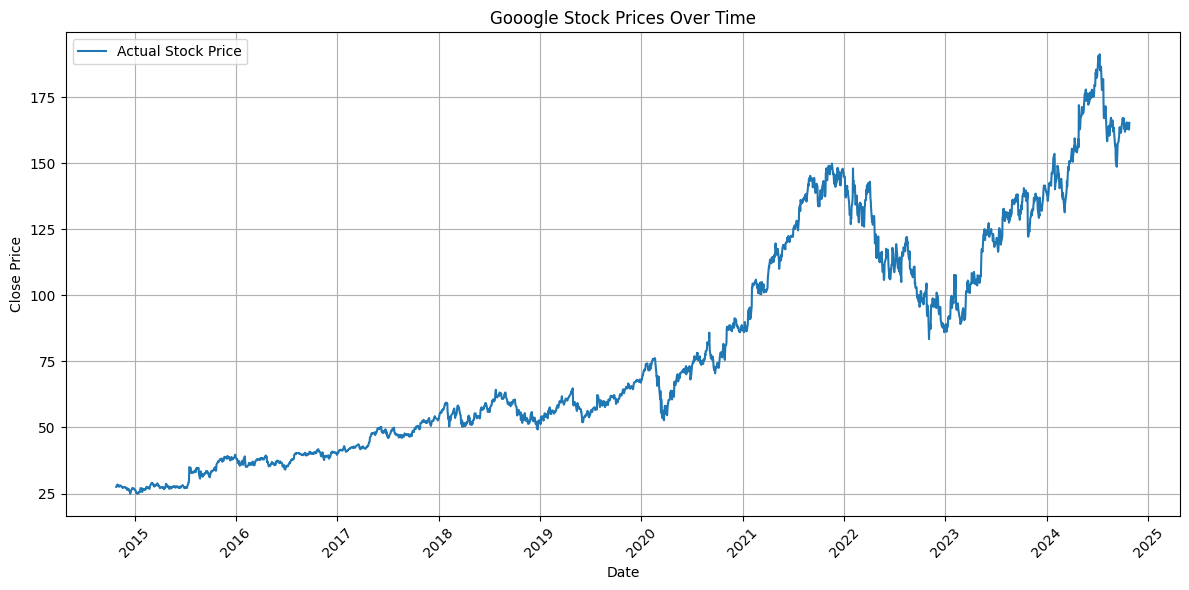

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close/Last'], label='Actual Stock Price')
plt.title('Gooogle Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
data['Month'] = data['Date'].dt.month

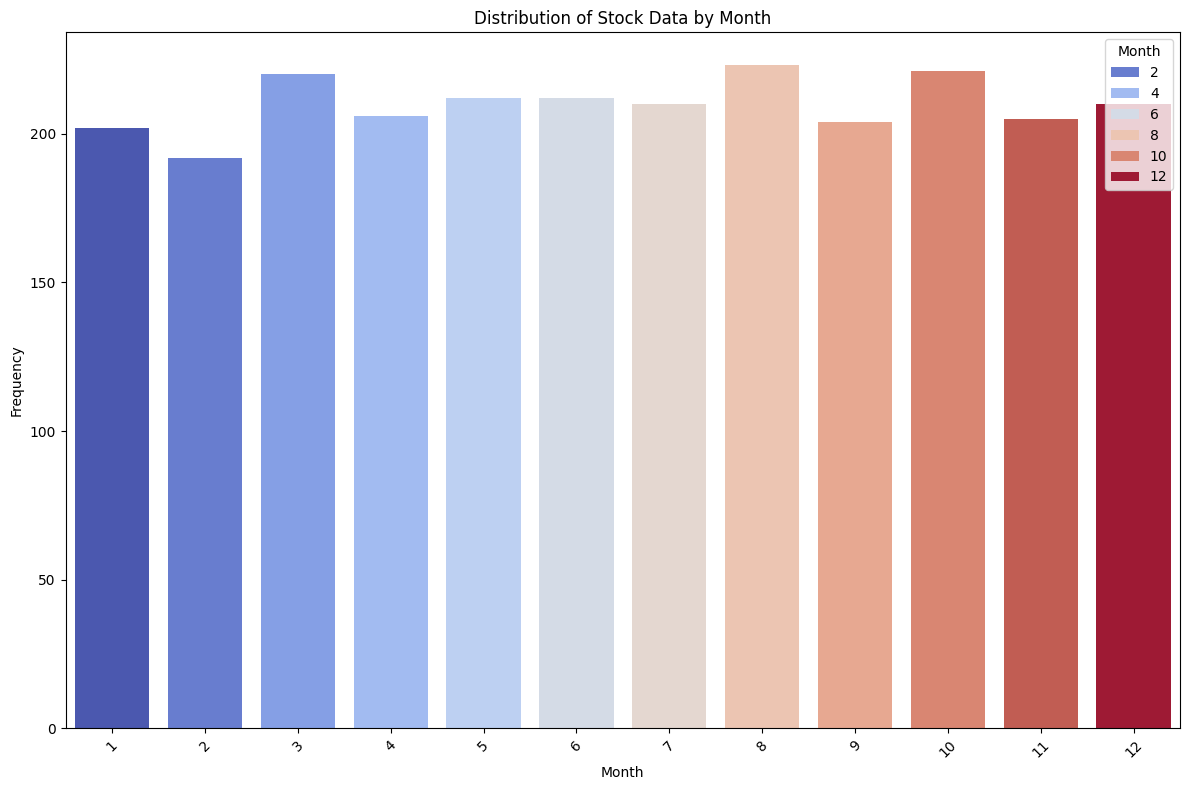

In [ ]:

plt.figure(figsize=(12, 8))
sns.countplot(x='Month', data=data,hue = 'Month', palette='coolwarm')
plt.title('Distribution of Stock Data by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
data.set_index(data['Date'], drop= True, inplace=True)

In [ ]:
data.sort_index(ascending=True, inplace=True)
data.head()

,Date,Close/Last,Volume,Open,High,Low,Month
Date,,,,,,,
2014-10-27,2014-10-27,27.4940,31934440,27.3880,27.7000,27.3600,10
2014-10-28,2014-10-28,27.9470,34626300,27.5855,27.9600,27.5215,10
2014-10-29,2014-10-29,27.9225,41052460,28.0425,28.2485,27.7990,10
2014-10-30,2014-10-30,28.0135,32223540,27.9125,28.1250,27.6065,10
2014-10-31,2014-10-31,28.3935,46783920,28.4150,28.4365,28.2405,10


In [ ]:
data['MA10'] = data['Close/Last'].rolling(10).mean()
data['MA12'] = data['Close/Last'].rolling(12).mean()
data['MA20'] = data['Close/Last'].rolling(20).mean()
data['MA30'] = data['Close/Last'].rolling(30).mean()
data['MA50'] = data['Close/Last'].rolling(50).mean()
data['MA100'] = data['Close/Last'].rolling(100).mean()
data['MA200'] = data['Close/Last'].rolling(200).mean()
data['Previous day close price'] = data['Close/Last'].shift(1)
data['Change in price'] = data['Close/Last'] - data['Previous day close price']
data['Percent change in price'] = data['Close/Last'].pct_change()

In [ ]:
data.isnull().sum()

,0
Date,0
Close/Last,0
Volume,0
Open,0
High,0
Low,0
Month,0
MA10,9
MA12,11
MA20,19


In [ ]:
data.fillna(method='bfill', inplace=True)

In [ ]:
data.isnull().sum()

,0
Date,0
Close/Last,0
Volume,0
Open,0
High,0
Low,0
Month,0
MA10,0
MA12,0
MA20,0


In [ ]:
data.head()

,Date,Close/Last,Volume,Open,High,Low,Month,MA10,MA12,MA20,MA30,MA50,MA100,MA200,Previous day close price,Change in price,Percent change in price
Date,,,,,,,,,,,,,,,,,
2014-10-27,2014-10-27,27.4940,31934440,27.3880,27.7000,27.3600,10,27.91415,27.926458,27.750575,27.51725,26.9968,27.018716,27.889384,27.4940,0.4530,0.016476
2014-10-28,2014-10-28,27.9470,34626300,27.5855,27.9600,27.5215,10,27.91415,27.926458,27.750575,27.51725,26.9968,27.018716,27.889384,27.4940,0.4530,0.016476
2014-10-29,2014-10-29,27.9225,41052460,28.0425,28.2485,27.7990,10,27.91415,27.926458,27.750575,27.51725,26.9968,27.018716,27.889384,27.9470,-0.0245,-0.000877
2014-10-30,2014-10-30,28.0135,32223540,27.9125,28.1250,27.6065,10,27.91415,27.926458,27.750575,27.51725,26.9968,27.018716,27.889384,27.9225,0.0910,0.003259
2014-10-31,2014-10-31,28.3935,46783920,28.4150,28.4365,28.2405,10,27.91415,27.926458,27.750575,27.51725,26.9968,27.018716,27.889384,28.0135,0.3800,0.013565


In [ ]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    print("Results of Dickey Fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

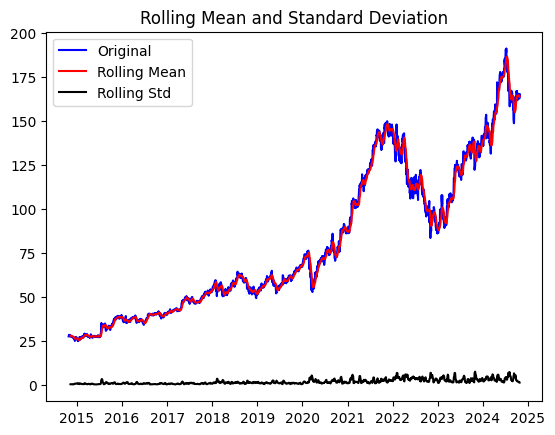

Results of Dickey Fuller test
Test Statistics                   0.072232
p-value                           0.964113
No. of lags used                 24.000000
Number of observations used    2492.000000
critical value (1%)              -3.432977
critical value (5%)              -2.862701
critical value (10%)             -2.567388
dtype: float64


In [ ]:
test_stationarity(data['Close/Last'])

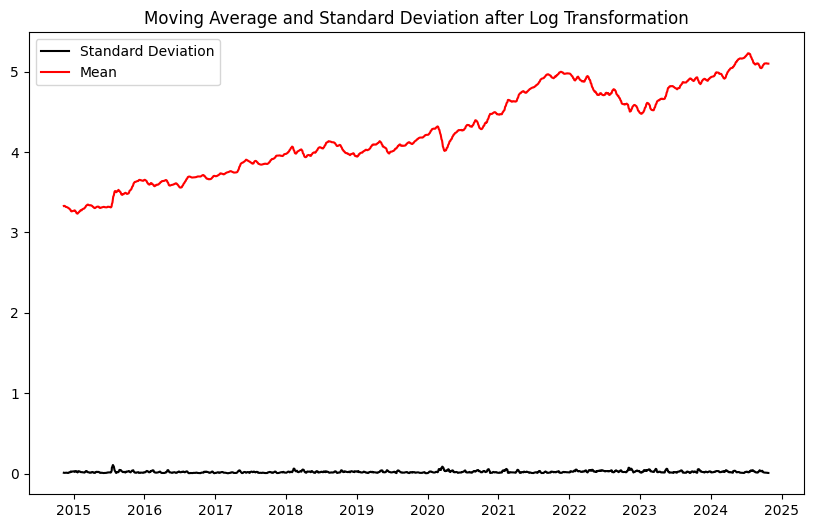

In [ ]:
df_log = np.log(data['Close/Last'])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.figure(figsize=(10,6))
plt.legend(loc='best')
plt.title('Moving Average and Standard Deviation after Log Transformation')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

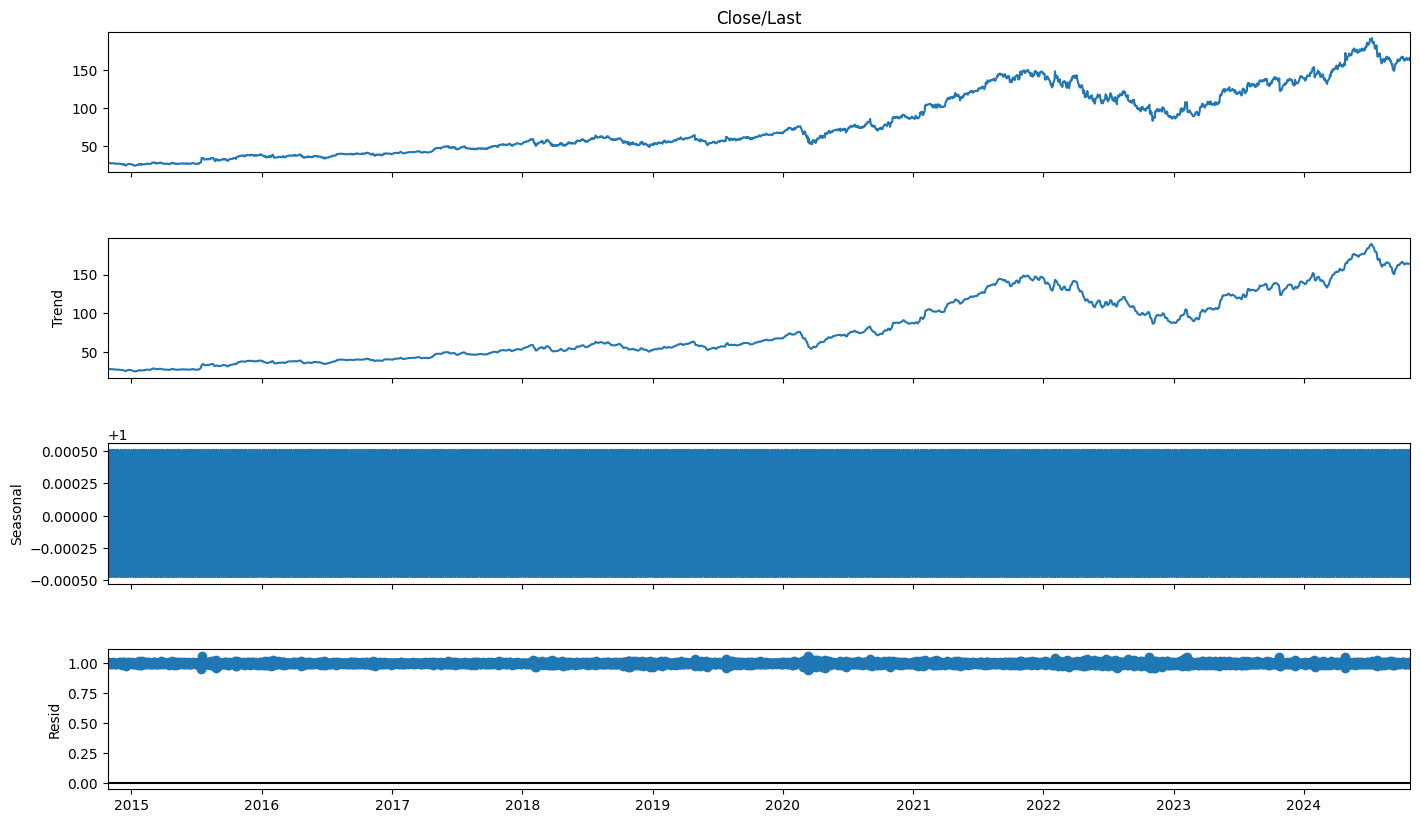

In [ ]:
result = seasonal_decompose(data['Close/Last'], model='multiplicative', period = 4)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)

In [ ]:
data['diffclose'] = data['Close/Last'].diff().dropna()

In [ ]:
data.isna().sum()
data.dropna(inplace=True)

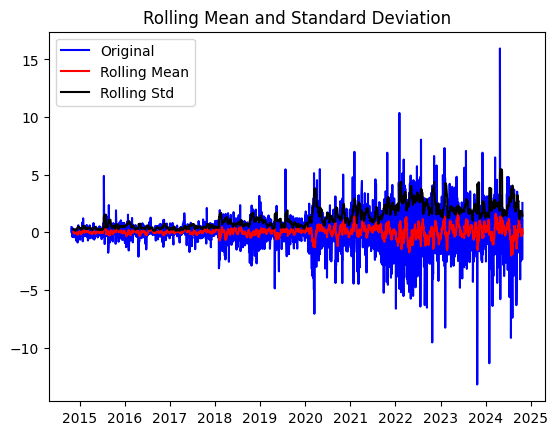

Results of Dickey Fuller test
Test Statistics               -1.124030e+01
p-value                        1.814076e-20
No. of lags used               2.300000e+01
Number of observations used    2.492000e+03
critical value (1%)           -3.432977e+00
critical value (5%)           -2.862701e+00
critical value (10%)          -2.567388e+00
dtype: float64


In [ ]:
test_stationarity(data['diffclose'])

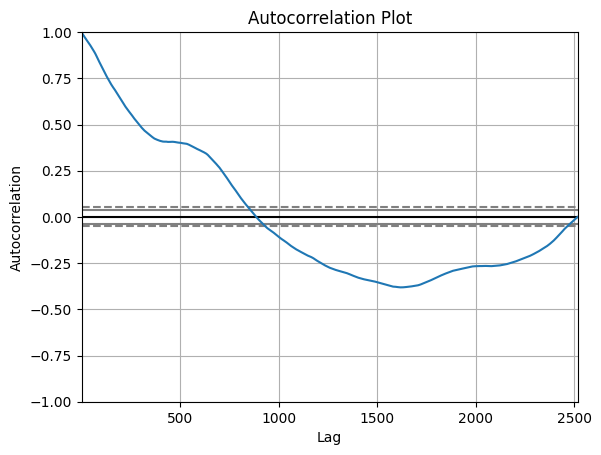

In [ ]:
pd.plotting.autocorrelation_plot(data['Close/Last'])
plt.title('Autocorrelation Plot')
plt.show()

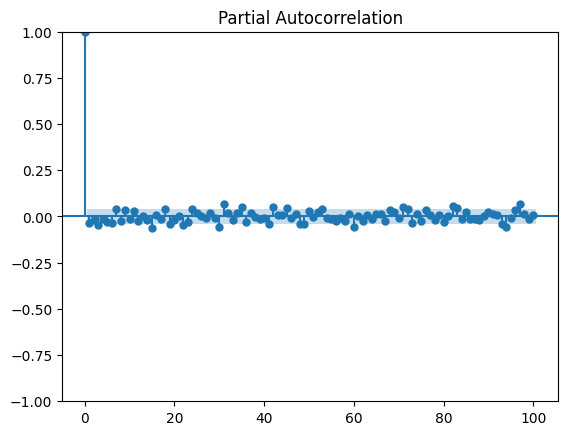

In [ ]:
plot_pacf(data["diffclose"], lags = 100);

In [ ]:
data.index = pd.to_datetime(data.index)

In [ ]:
data = data.asfreq('D').fillna(method='ffill')

In [ ]:
data.tail()

,Date,Close/Last,Volume,Open,High,Low,Month,MA10,MA12,MA20,MA30,MA50,MA100,MA200,Previous day close price,Change in price,Percent change in price,diffclose
Date,,,,,,,,,,,,,,,,,,
2024-10-21,2024-10-21,164.07,20946460.0,162.95,164.50,162.620,10.0,163.756,163.966667,164.1310,161.978667,161.7818,169.2421,160.672175,163.42,0.65,0.003977,0.65
2024-10-22,2024-10-22,165.14,16568120.0,162.98,165.77,162.980,10.0,163.832,163.806667,164.2735,162.528000,161.8388,169.1724,160.819225,164.07,1.07,0.006522,1.07
2024-10-23,2024-10-23,162.78,18280520.0,164.76,165.82,161.925,10.0,163.924,163.790000,164.3380,162.915333,161.8112,169.0752,160.938925,165.14,-2.36,-0.014291,-2.36
2024-10-24,2024-10-24,162.72,22412530.0,162.83,163.33,161.010,10.0,163.988,163.651667,164.3375,163.183000,161.8582,168.9707,161.047775,162.78,-0.06,-0.000369,-0.06
2024-10-25,2024-10-25,165.27,19828880.0,163.67,165.59,163.420,10.0,164.191,163.935833,164.4035,163.443333,161.9376,168.8855,161.162725,162.72,2.55,0.015671,2.55


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
y = data['Close/Last']
exog = data[['MA10', 'MA20', 'MA200', 'Previous day close price']]


train_size = int(len(y) * 0.8)
y_train, y_test = y[:train_size], y[train_size:]
exog_train, exog_test = exog[:train_size], exog[train_size:]

In [ ]:
model = SARIMAX(y_train, order=(1, 1, 3), exog=exog_train)
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


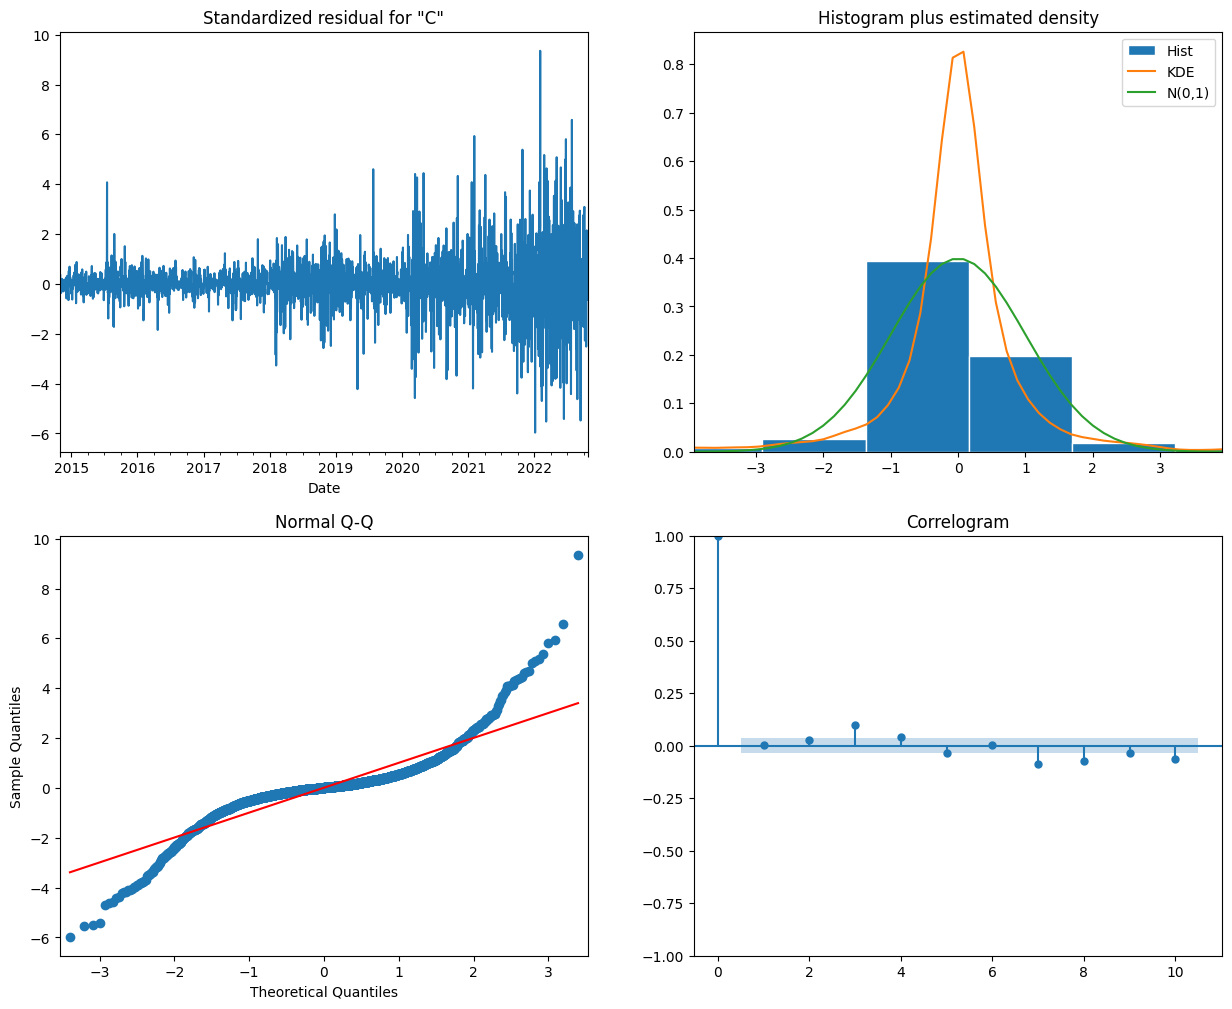

In [ ]:
model_fit.plot_diagnostics(figsize=(15,12))
plt.show()

In [ ]:
forecast = model_fit.forecast(steps=len(y_test), exog = exog_test)

In [ ]:
mae = mean_absolute_error(y_test, forecast)
rmse = np.sqrt(mean_squared_error(y_test, forecast))

In [ ]:
print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MSE: {mean_squared_error(y_test, forecast)}')
print(f'R2: {r2_score(y_test, forecast):.4f}')

MAE: 3.5387
RMSE: 4.6133
MSE: 21.282833019697758
R2: 0.9723


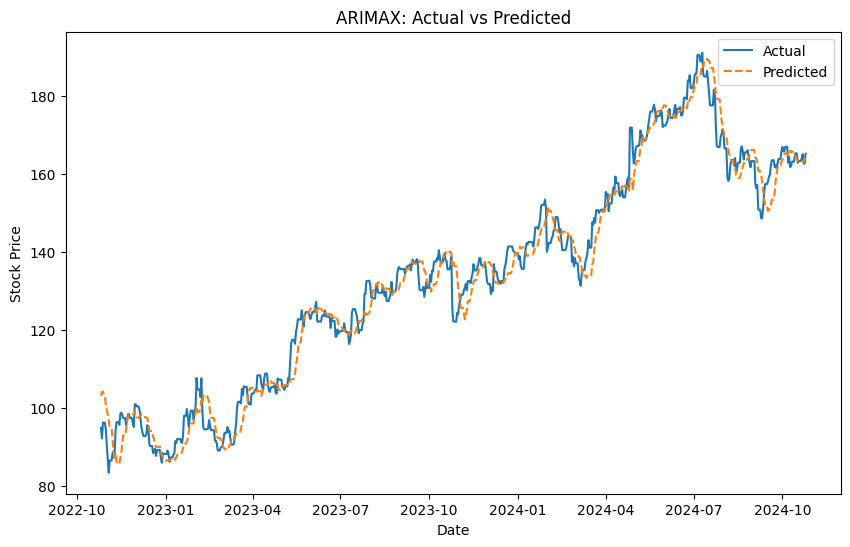

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, forecast, label='Predicted', linestyle='--')
plt.legend()
plt.title('ARIMAX: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

# LSTM + ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
data.head()

,Date,Close/Last,Volume,Open,High,Low,Month,MA10,MA12,MA20,MA30,MA50,MA100,MA200,Previous day close price,Change in price,Percent change in price,diffclose,second diffclose,third diffclose
Date,,,,,,,,,,,,,,,,,,,,
2014-10-30,2014-10-30,28.0135,32223540.0,27.9125,28.1250,27.6065,10.0,27.91415,27.926458,27.750575,27.51725,26.9968,27.018716,27.889384,27.9225,0.091,0.003259,0.091,0.1155,0.5930
2014-10-31,2014-10-31,28.3935,46783920.0,28.4150,28.4365,28.2405,10.0,27.91415,27.926458,27.750575,27.51725,26.9968,27.018716,27.889384,28.0135,0.380,0.013565,0.380,0.2890,0.1735
2014-11-01,2014-10-31,28.3935,46783920.0,28.4150,28.4365,28.2405,10.0,27.91415,27.926458,27.750575,27.51725,26.9968,27.018716,27.889384,28.0135,0.380,0.013565,0.380,0.2890,0.1735
2014-11-02,2014-10-31,28.3935,46783920.0,28.4150,28.4365,28.2405,10.0,27.91415,27.926458,27.750575,27.51725,26.9968,27.018716,27.889384,28.0135,0.380,0.013565,0.380,0.2890,0.1735
2014-11-03,2014-11-03,28.1885,30829720.0,28.1765,28.3575,28.0815,11.0,27.91415,27.926458,27.750575,27.51725,26.9968,27.018716,27.889384,28.3935,-0.205,-0.007220,-0.205,-0.5850,-0.8740


In [ ]:
arima_model = ARIMA(data['Close/Last'], order=(1, 1, 3))
arima_result = arima_model.fit()

# Predict using ARIMA
arima_pred = arima_result.predict(start=0, end=len(data) - 1, typ='levels')
arima_residuals = data['Close/Last'] - arima_pred  # Residuals to feed into LSTM


In [ ]:
# Split residuals for training
train_size = int(len(arima_residuals) * 0.8)
train_residuals = arima_residuals[:train_size].values.reshape(-1, 1)
test_residuals = arima_residuals[train_size:].values.reshape(-1, 1)

# Create LSTM dataset (sequence data)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Number of time steps
X_train, y_train = create_sequences(train_residuals, seq_length)
X_test, y_test = create_sequences(test_residuals, seq_length)

In [ ]:
# LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=False, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.3962
Epoch 2/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3551
Epoch 3/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3093
Epoch 4/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1585
Epoch 5/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.3159
Epoch 6/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2344
Epoch 7/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3964
Epoch 8/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3801
Epoch 9/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.4189
Epoch 10/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1626
Epoch 11/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2720
Epoch 12/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2432
Epoch 13/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4703
Epoch 14/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2086
Epoch 15/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3304
Epoch 16/50
91/91 ━

In [ ]:
# Predict residuals using LSTM
lstm_residuals_pred = model.predict(X_test)

# Combine ARIMA predictions and LSTM residuals
arima_pred_test = arima_result.predict(start=len(train_residuals),
                                       end=len(data) - 11, typ='levels')
final_pred = arima_pred_test.values + lstm_residuals_pred.flatten()

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
close = data['Close/Last']
close = close[train_size + seq_length:]

In [ ]:
print(f'MAE: {mean_absolute_error(close, final_pred):.4f}')
print(f'RMSE: {np.sqrt(mean_squared_error(close, final_pred)):.4f}')
print(f'MSE: {mean_squared_error(close, final_pred)}')
print(f'R2: {r2_score(close, final_pred):.4f}')

MAE: 4.9743
RMSE: 6.4153
MSE: 41.15669708708813
R2: 0.9453


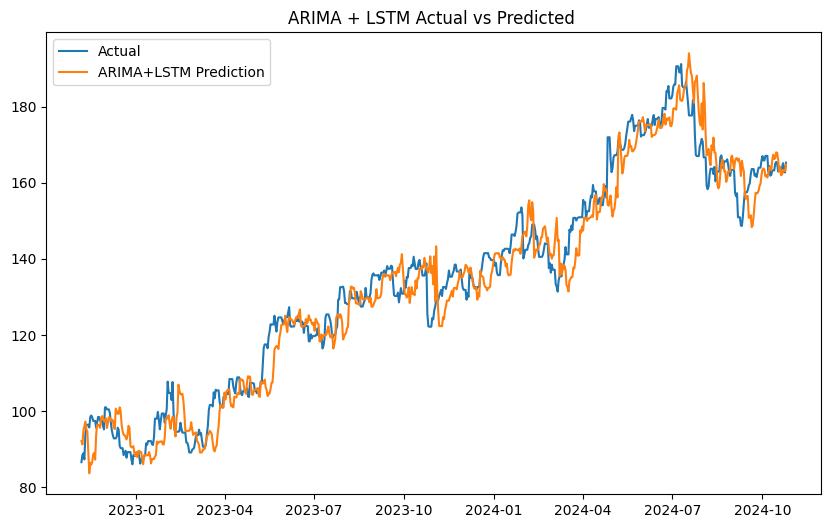

In [ ]:
# Plot final results
plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size + seq_length:], close, label='Actual')
plt.plot(data.index[train_size + seq_length:], final_pred, label='ARIMA+LSTM Prediction')
plt.legend()
plt.title("ARIMA + LSTM Actual vs Predicted ")
plt.show()

# Future Forecast Using ARIMAX

In [ ]:
# Start with the last row of the dataset for initial exog values
last_exog = exog.iloc[-1].copy()  # The last known exogenous values
last_price = y.iloc[-1]  # The last known close price
# Update exogenous variables for the next day based on the predicted price
new_ma10 = (last_exog['MA10'] * 9 + last_price) / 10  # Rolling calculation
new_ma20 = (last_exog['MA20'] * 19 + last_price) / 20  # Rolling calculation
new_ma200 = (last_exog['MA200'] * 199 + last_price) / 200  # Rolling calculation
new_previous_close = last_price  # The predicted price becomes the previous close
# Update the last exog values for the next iteration
last_exog['MA10'] = new_ma10
last_exog['MA20'] = new_ma20
last_exog['MA200'] = new_ma200
last_exog['Previous day close price'] = new_previous_close

# Create a placeholder for the forecasted prices
future_forecast = []

# Iteratively forecast for the next 30 days
for _ in range(30):
    # Forecast the next day's price
    predicted_price = model_fit.forecast(steps=1, exog=last_exog.values.reshape(1, -1)).iloc[0]
    future_forecast.append(predicted_price)

    # Update exogenous variables for the next day based on the predicted price
    new_ma10 = (last_exog['MA10'] * 9 + predicted_price) / 10  # Rolling calculation
    new_ma20 = (last_exog['MA20'] * 19 + predicted_price) / 20  # Rolling calculation
    new_ma200 = (last_exog['MA200'] * 199 + predicted_price) / 200  # Rolling calculation
    #new_change_in_price = predicted_price - last_price  # Price change
    new_previous_close = predicted_price  # The predicted price becomes the previous close

    # Update the last exog values for the next iteration
    last_exog['MA10'] = new_ma10
    last_exog['MA20'] = new_ma20
    last_exog['MA200'] = new_ma200
    last_exog['Previous day close price'] = new_previous_close
    #last_exog['Change in price'] = new_change_in_price

    # Update the last_price for the next iteration
    last_price = predicted_price

# Create a DataFrame for the forecasted values
forecasted_dates = pd.date_range(start=y.index[-1] + pd.Timedelta(days=1), periods=30)
forecast_df = pd.DataFrame({'Date': forecasted_dates, 'Predicted Price': future_forecast})

# Display the forecast
print(forecast_df)


         Date  Predicted Price
0  2024-10-26       168.595084
1  2024-10-27       168.272265
2  2024-10-28       168.901187
3  2024-10-29       169.288951
4  2024-10-30       169.744739
5  2024-10-31       170.188229
6  2024-11-01       170.640108
7  2024-11-02       171.094876
8  2024-11-03       171.553827
9  2024-11-04       172.016498
10 2024-11-05       172.482885
11 2024-11-06       172.952871
12 2024-11-07       173.426370
13 2024-11-08       173.903294
14 2024-11-09       174.383558
15 2024-11-10       174.867080
16 2024-11-11       175.353781
17 2024-11-12       175.843583
18 2024-11-13       176.336414
19 2024-11-14       176.832202
20 2024-11-15       177.330877
21 2024-11-16       177.832372
22 2024-11-17       178.336623
23 2024-11-18       178.843567
24 2024-11-19       179.353143
25 2024-11-20       179.865294
26 2024-11-21       180.379961
27 2024-11-22       180.897091
28 2024-11-23       181.416630
29 2024-11-24       181.938527


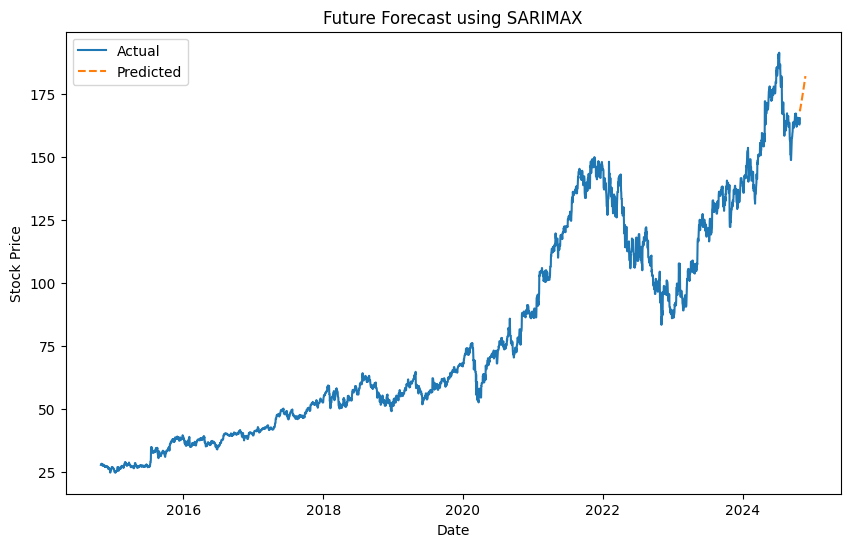

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y.index, y, label='Actual')
plt.plot(forecast_df['Date'], forecast_df['Predicted Price'], label='Predicted', linestyle='--')
plt.legend()
plt.title('Future Forecast using SARIMAX')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()